In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt


(trainX, trainY), (testX, testY) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 4s 0us/step


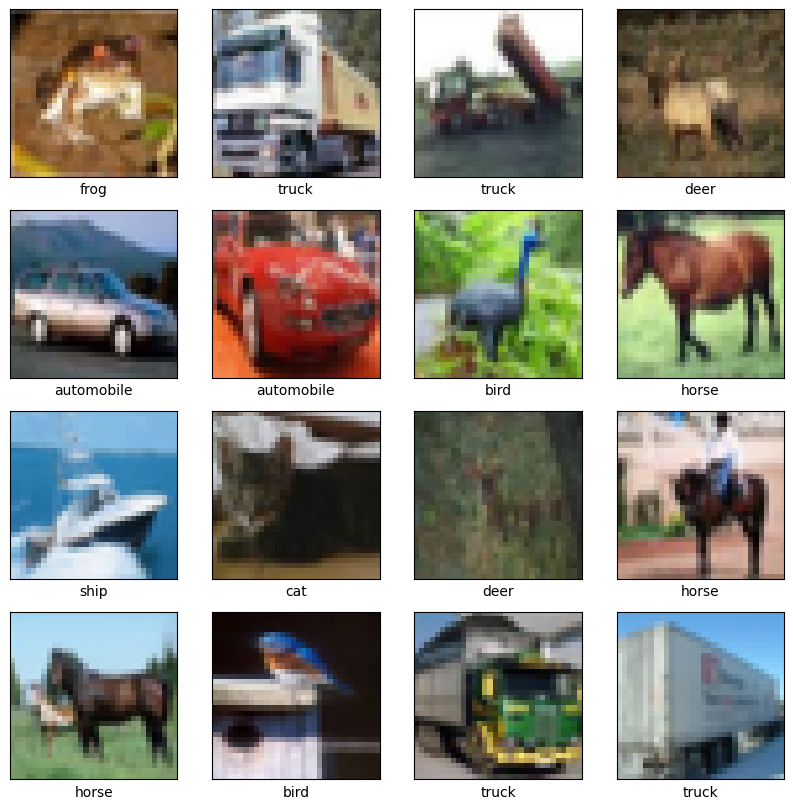

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i])
    plt.xlabel(class_names[trainY[i][0]])

plt.show()

Normalize values

In [ ]:
trainX = trainX / 255.0
testX = testX / 255.0

Call Back function to stop training at 85% accuracy

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.85):

      print("\nAccuracy is greater than 85%, so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

CNN Architecture

In [ ]:
# Reg. no. 400868
# layers 3,126,770.4

import tensorflow as tf

def CNN():
    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(64, (7,7), activation='relu'),
            tf.keras.layers.Conv2D(128, (7,7), activation='relu'),
            tf.keras.layers.Conv2D(128, (7,7), activation='relu'),
            tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')]
    )
    return model

model = CNN()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        200768    
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       401536    
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         802944    
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 256)         2

In [ ]:
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY), callbacks=[callbacks])

Epoch 1/10
1563/1563 [==============================] - 2089s 1s/step - loss: 1.8427 - accuracy: 0.2947 - val_loss: 1.6127 - val_accuracy: 0.3849
Epoch 2/10
1563/1563 [==============================] - 2130s 1s/step - loss: 1.4967 - accuracy: 0.4495 - val_loss: 1.4128 - val_accuracy: 0.4776
Epoch 3/10
1563/1563 [==============================] - 2151s 1s/step - loss: 1.2830 - accuracy: 0.5379 - val_loss: 1.1950 - val_accuracy: 0.5651
Epoch 4/10
1563/1563 [==============================] - 2159s 1s/step - loss: 1.1578 - accuracy: 0.5829 - val_loss: 1.1052 - val_accuracy: 0.6047
Epoch 5/10
1563/1563 [==============================] - 2059s 1s/step - loss: 1.0864 - accuracy: 0.6149 - val_loss: 1.0576 - val_accuracy: 0.6266
Epoch 6/10
1563/1563 [==============================] - 2094s 1s/step - loss: 1.0169 - accuracy: 0.6388 - val_loss: 1.0719 - val_accuracy: 0.6211
Epoch 7/10
1563/1563 [==============================] - 2046s 1s/step - loss: 0.9618 - accuracy: 0.6592 - val_loss: 1.0299 -

Accuracy Plot

313/313 - 98s - loss: 0.9922 - accuracy: 0.6582 - 98s/epoch - 313ms/step


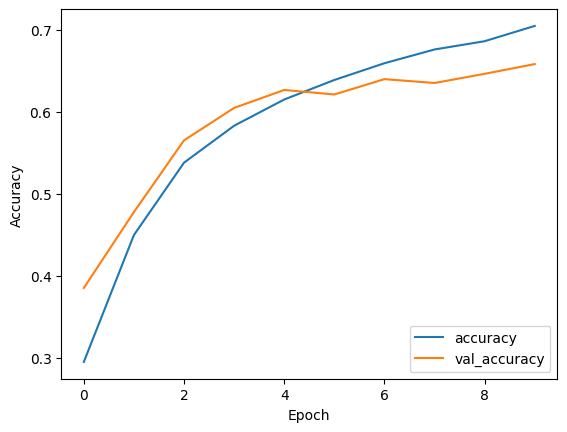

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

Loss Plot

313/313 - 96s - loss: 0.9922 - accuracy: 0.6582 - 96s/epoch - 307ms/step


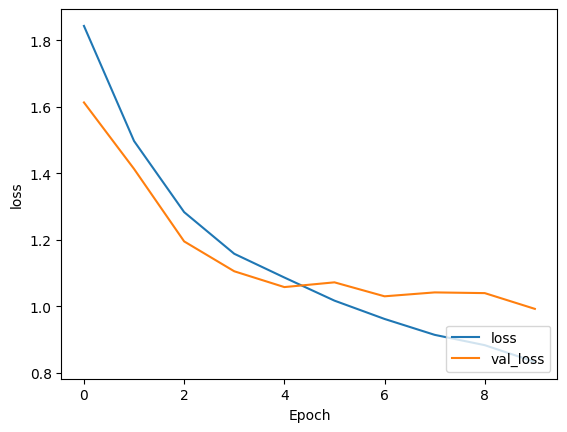

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)